In [1]:
cd /g/data/jk72/deg581/apom/ana/notebooks

/g/data/jk72/deg581/apom/ana/notebooks


In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import matplotlib.ticker as mticker

## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

'/jobfs/122621793.gadi-pbs'

In [3]:


FilePath='/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/' # Truth file settings
prefix='roms_his_'
timeRange = [12, 13]
datelist = np.array(range(timeRange[0],timeRange[1],1))

def add_zeros_to_4(date):
    if date<10:
        to_add = '000'
    elif date>9 & date<100:
        to_add = '00'
    elif date>99 & date < 1000:
        to_add = '0'
    else: 
        to_add = ''
    return to_add

def generateFileList(FilePath,prefix,datelist):
    filelist=[FilePath+prefix+add_zeros_to_4(datelist[0])+str(datelist[0])+'.nc']
    for dates in datelist[1:]:
        filenameToAppend=FilePath+prefix+add_zeros_to_4(dates)+str(dates)+'.nc'
        filelist.append(filenameToAppend)
    return filelist

fl=generateFileList(FilePath,prefix,datelist)
print(fl)

# ds=loadOverlappedNetcdfFileList(filelist=fl,overlapDays=7)

ds = xr.open_mfdataset(fl,chunks = {'ocean_time':1}, data_vars='minimal', compat='override',coords='minimal',parallel='False',join='right')

print(ds.nbytes/1e9,'G')



['/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0012.nc']
255.264537416 G


In [4]:
grd = xr.open_dataset('/g/data/jk72/deg581/apom/frc/amery_v2km_v12_grd.nc')

grd['hc']=ds.hc
grd['s_w']=ds.s_w
grd['s_rho']=ds.s_rho
grd['Cs_w']=ds.Cs_w
grd['Cs_r']=ds.Cs_r


In [5]:
# load single ROMS netcdf with xr
# ds = xr.open_dataset('../data/proc/roms_v11_TotOptions_his_0003_5daymn.nc')
ds = xr.open_dataset('../data/proc/roms_v11_ctrl_his_0011-13_5daymn_full.nc')
ds

<xarray.Dataset>
Dimensions:          (ocean_time: 219, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, eta_rho: 750, xi_rho: 900, eta_u: 750,
                      xi_u: 899, eta_v: 749, xi_v: 900, eta_psi: 749,
                      xi_psi: 899)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2017-01-01 ... 2019-12-27
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
Dimensions without coordinates: bnds, tracer, boundary, eta_rho, xi_rho, eta_u,
                                xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/46)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    FSobc_in         (boundary) float64 ...
    ...               ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    rho              (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    shflux           (ocean_time, eta_rho, xi_rho) float32 ...
    ssflux           (ocean_time, eta_rho, xi_rho) float32 ...
    sustr            (ocean_time, eta_u, xi_u) float32 ...
    svstr            (ocean_time, eta_v, xi_v) float32 ...
Attributes: (12/34)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0011.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           Wed Apr 10 14:09:20 2024: cdo -v timselmean,5 -cat /g/...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

In [6]:
ds = ds.drop_vars(['Tb','Sb','u_eastward','v_northward','ubar_eastward','vbar_northward','w','sustr','svstr','zeta','rho'])
print(ds.nbytes/1e9,'G')
ds

75.104272872 G


<xarray.Dataset>
Dimensions:          (ocean_time: 219, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, eta_rho: 750, xi_rho: 900, eta_u: 750,
                      xi_u: 899, eta_v: 749, xi_v: 900, eta_psi: 749,
                      xi_psi: 899)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2017-01-01 ... 2019-12-27
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
Dimensions without coordinates: bnds, tracer, boundary, eta_rho, xi_rho, eta_u,
                                xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/35)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    FSobc_in         (boundary) float64 ...
    ...               ...
    u                (ocean_time, s_rho, eta_u, xi_u) float32 ...
    v                (ocean_time, s_rho, eta_v, xi_v) float32 ...
    temp             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    shflux           (ocean_time, eta_rho, xi_rho) float32 ...
    ssflux           (ocean_time, eta_rho, xi_rho) float32 ...
Attributes: (12/34)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0011.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           Wed Apr 10 14:09:20 2024: cdo -v timselmean,5 -cat /g/...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

In [7]:
# chop in time, selecting a smaller segment
ds = ds.sel(ocean_time=slice('2019-01-01','2020-01-01'))
print(ds.nbytes/1e9,'G')
ds

25.070740968 G


<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, eta_rho: 750, xi_rho: 900, eta_u: 750,
                      xi_u: 899, eta_v: 749, xi_v: 900, eta_psi: 749,
                      xi_psi: 899)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2019-01-01 ... 2019-12-27
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
Dimensions without coordinates: bnds, tracer, boundary, eta_rho, xi_rho, eta_u,
                                xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/35)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    FSobc_in         (boundary) float64 ...
    ...               ...
    u                (ocean_time, s_rho, eta_u, xi_u) float32 ...
    v                (ocean_time, s_rho, eta_v, xi_v) float32 ...
    temp             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    shflux           (ocean_time, eta_rho, xi_rho) float32 ...
    ssflux           (ocean_time, eta_rho, xi_rho) float32 ...
Attributes: (12/34)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0011.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           Wed Apr 10 14:09:20 2024: cdo -v timselmean,5 -cat /g/...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

In [8]:
ds = ds.drop_vars(['m','u','v'])
print(ds.nbytes/1e9,'G')
ds

12.668376768 G


<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, eta_rho: 750, xi_rho: 900, eta_u: 750,
                      xi_u: 899, eta_v: 749, xi_v: 900, eta_psi: 749,
                      xi_psi: 899)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2019-01-01 ... 2019-12-27
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
Dimensions without coordinates: bnds, tracer, boundary, eta_rho, xi_rho, eta_u,
                                xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/32)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    FSobc_in         (boundary) float64 ...
    ...               ...
    mask_v           (eta_v, xi_v) float64 ...
    mask_psi         (eta_psi, xi_psi) float64 ...
    temp             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    shflux           (ocean_time, eta_rho, xi_rho) float32 ...
    ssflux           (ocean_time, eta_rho, xi_rho) float32 ...
Attributes: (12/34)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0011.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           Wed Apr 10 14:09:20 2024: cdo -v timselmean,5 -cat /g/...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

In [9]:
ds = ds.load()

In [10]:
ds = ds.assign_coords({"x_rho": grd.x_rho})
ds = ds.assign_coords({"y_rho": grd.y_rho})
ds = ds.assign_coords({"lon_rho": grd.lon_rho})
ds = ds.assign_coords({"lat_rho": grd.lat_rho})

ds['hc'] = grd.hc
ds['s_w']=grd.s_w
ds['s_rho']=grd.s_rho
ds['Cs_w']=grd.Cs_w
ds['Cs_r']=grd.Cs_r


# ds_raw = ds_raw.assign_coords(lon_rho=grd.lon_rho)
# ds_raw = ds_raw.assign_coords(lat_rho=grd.lat_rho)

ds['mask_zice'] = (ds.mask_rho.where(ds.zice<0)==1) # make a logic mask for ice
ds['mask_zice_nan'] = (ds.mask_rho.where(ds.zice<0)==1).where(ds.mask_rho.where(ds.zice<0)==1) # make a mask where non-ice is nan

In [11]:
# make masks

# now make a ROI mask(s)
# plt.figure(figsize=(6,4))
# ds.mask_zice.plot(x='x_rho',y='y_rho')
# plt.grid()
poly_shelf = np.array([
    [1.55e6,600000],
    [2.25e6,600000],
    [2.25e6,800000],
    [2.20e6,830000],
    [1.55e6,890000]])
# plt.plot(poly_shelf[:,0],poly_shelf[:,1])
# plt.show()

def inpolygon(xq, yq, xv, yv):
    from matplotlib import path
    shape = xq.shape
    xq = xq.reshape(-1)
    yq = yq.reshape(-1)
    xv = xv.reshape(-1)
    yv = yv.reshape(-1)
    q = [(xq[i], yq[i]) for i in range(xq.shape[0])]
    p = path.Path([(xv[i], yv[i]) for i in range(xv.shape[0])])
    return p.contains_points(q).reshape(shape)


mask_roi = inpolygon(ds.x_rho.values, ds.y_rho.values,poly_shelf[:,0], poly_shelf[:,1])


ds['mask_zice_roi'] = ds.mask_zice*mask_roi
# ds.mask_zice_roi.plot()
roi_label1 = 'amery'
ds.mask_zice_roi.attrs['long_name']=roi_label1

In [12]:
weights = (1/ds.pm)*(1/ds.pn)
weights.name = "weights"

In [13]:
# ds.load()

In [14]:
# set any grid data here.

weights_area = (1/ds.pm)*(1/ds.pn)
weights_area.name = "weights"

print('making vertical coordinates')
Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = (ds.zice) + ((ds.zice) + ds.h) * Zo_rho
Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
z_w = Zo_w * ((ds.zice) + ds.h) + (ds.zice)
    
ds.coords['z_w0'] = z_w.where(ds.mask_rho, 0).transpose('s_w', 'eta_rho', 'xi_rho')
ds.coords['z_rho0'] = z_rho.where(ds.mask_rho, 0).transpose('s_rho', 'eta_rho', 'xi_rho')

# ds['dz'] = (('ocean_time','s_rho', 'eta_rho', 'xi_rho'),np.diff(ds.z_w,axis=1))



making vertical coordinates


In [15]:
# map u,v to rho points
def ROMSmetricsAndGrid(ds):
    ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

    coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
        'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
        'Z':{'center':'s_rho', 'outer':'s_w'}}

    grid = Grid(ds, coords=coords, periodic=[])

    print('making pm/pn metrics')
    ds['pm_v'] = grid.interp(ds.pm, 'Y')
    ds['pn_u'] = grid.interp(ds.pn, 'X')
    ds['pm_u'] = grid.interp(ds.pm, 'X')
    ds['pn_v'] = grid.interp(ds.pn, 'Y')
    ds['pm_psi'] = grid.interp(grid.interp(ds.pm, 'Y'),  'X') # at psi points (eta_v, xi_u) 
    ds['pn_psi'] = grid.interp(grid.interp(ds.pn, 'X'),  'Y') # at psi points (eta_v, xi_u)
    print('making dx/dy')
    ds['dx'] = 1/ds.pm
    ds['dx_u'] = 1/ds.pm_u
    ds['dx_v'] = 1/ds.pm_v
    ds['dx_psi'] = 1/ds.pm_psi

    ds['dy'] = 1/ds.pn
    ds['dy_u'] = 1/ds.pn_u
    ds['dy_v'] = 1/ds.pn_v
    ds['dy_psi'] = 1/ds.pn_psi

#     ds['dz'] = grid.diff(ds.z_w, 'Z', boundary='fill')
#     ds['dz_w'] = grid.diff(ds.z_rho, 'Z', boundary='fill')
#     ds['dz_u'] = grid.interp(ds.dz, 'X')
#     ds['dz_w_u'] = grid.interp(ds.dz_w, 'X')
#     ds['dz_v'] = grid.interp(ds.dz, 'Y')
#     ds['dz_w_v'] = grid.interp(ds.dz_w, 'Y')

    ds['dA'] = ds.dx * ds.dy

    metrics = {
        ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
        ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
        # ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
        ('X', 'Y'): ['dA'] # Areas
    }
    grid = Grid(ds, coords=coords, metrics=metrics, periodic=[])

    return ds,grid


ds, grid = ROMSmetricsAndGrid(ds)

# print('mapping u/v to u/v rho')
# ds['u_rho'] = grid.interp(ds.u,'X')
# ds['v_rho'] = grid.interp(ds.v,'Y')

making pm/pn metrics
making dx/dy


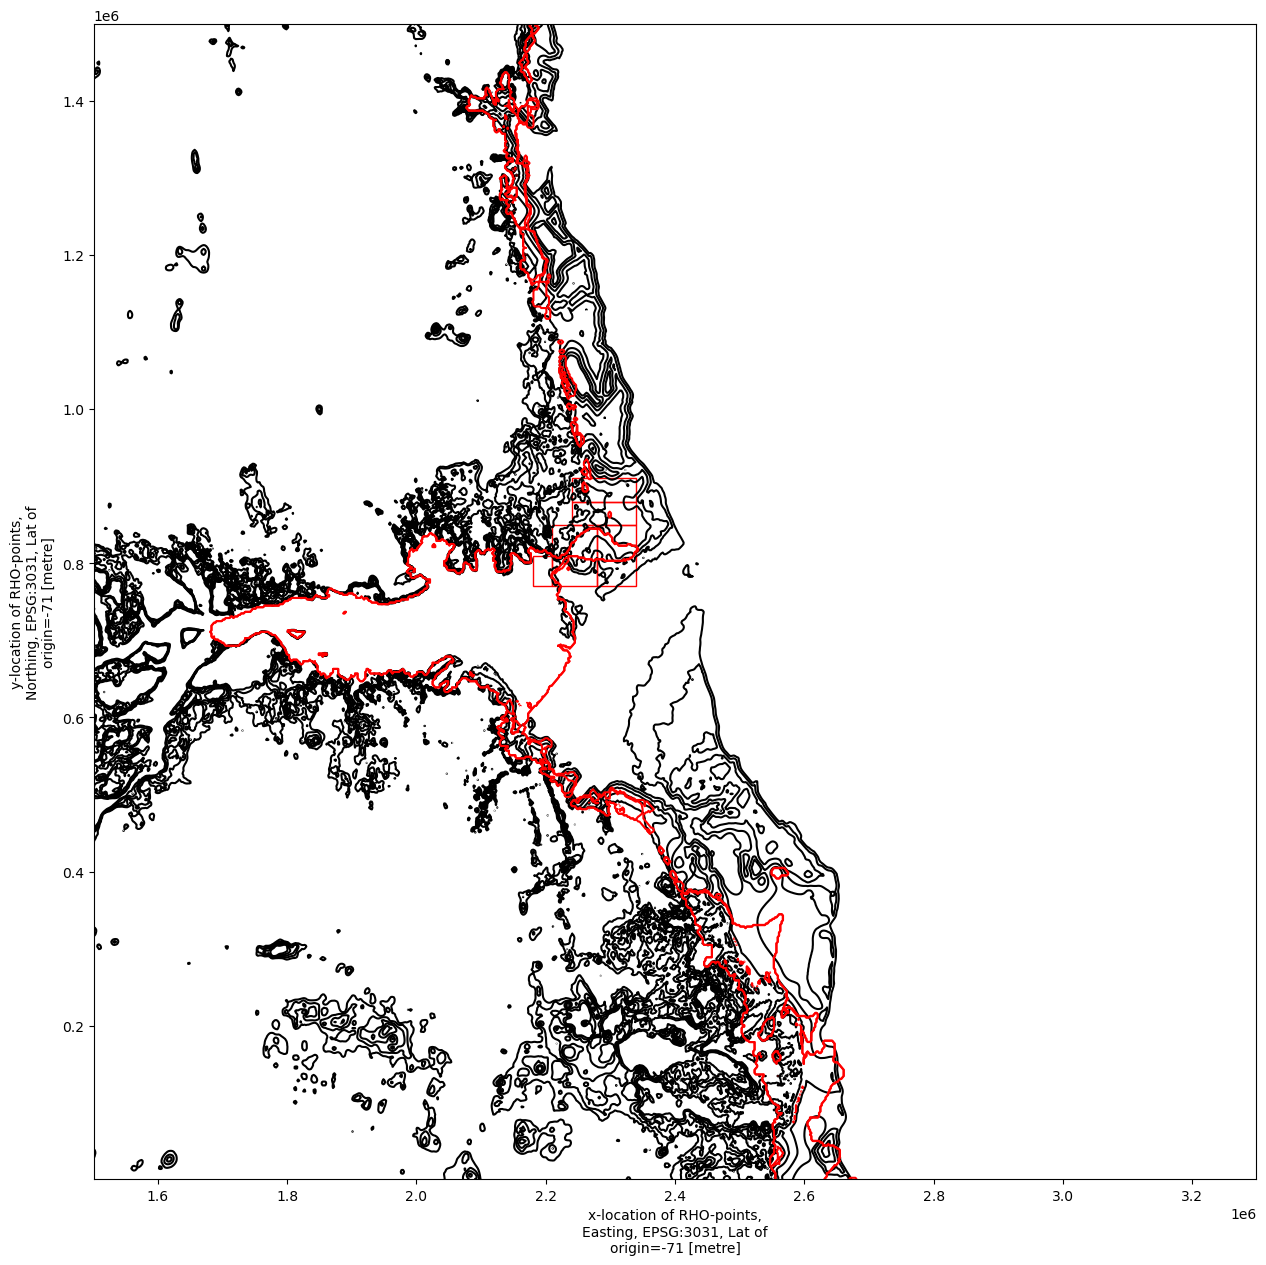

In [16]:
from matplotlib.patches import Rectangle

#%matplotlib widget

plt.figure(figsize=(15,15)),
# ds.my_doy.mean(dim='dayofyear').plot(x='x_rho',y='y_rho',cmap='RdBu',vmin=0,vmax=10)
ds.h.plot.contour(x='x_rho',y='y_rho',levels=(0,100,200,300,400,500),colors='k')
(-1*ds.zice*ds.mask_rho).plot.contour(x='x_rho',y='y_rho',levels=(0,1),colors='r')

pnt_bl=(2.21e6,.77e6)
pnt_tr=(2.28e6,.85e6)

plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))

pnt_bl=(2.28e6,.77e6)
pnt_tr=(2.34e6,.85e6)

plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))

pnt_bl=(2.24e6,.85e6)
pnt_tr=(2.34e6,.88e6)

plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))

pnt_bl=(2.24e6,.88e6)
pnt_tr=(2.34e6,.91e6)

plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))



pnt_bl=(2.18e6,.77e6)
pnt_tr=(2.21e6,.81e6)

plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))




%matplotlib inline

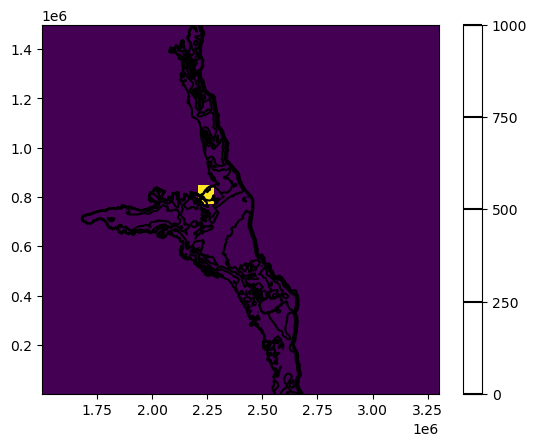

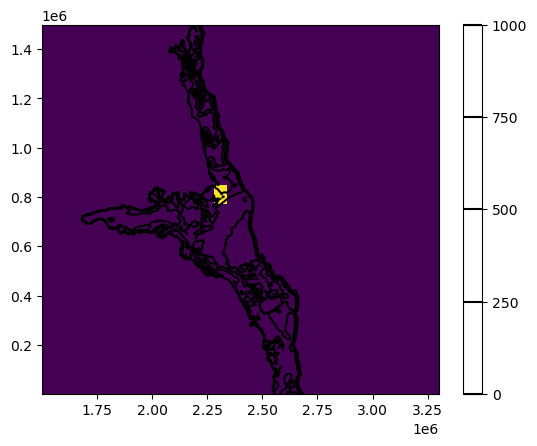

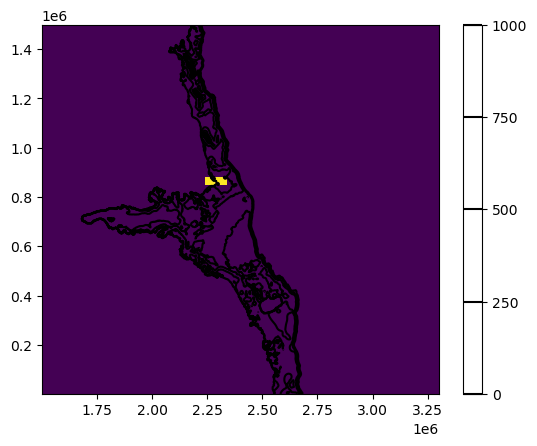

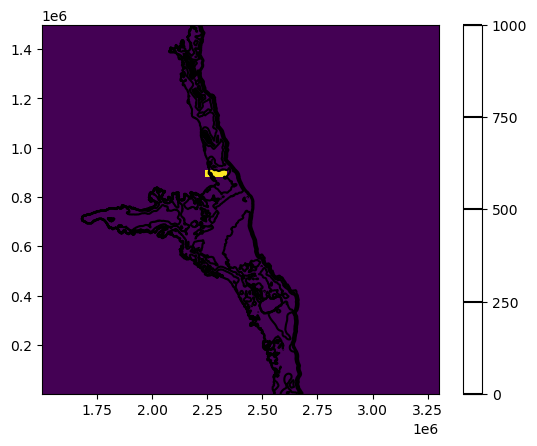

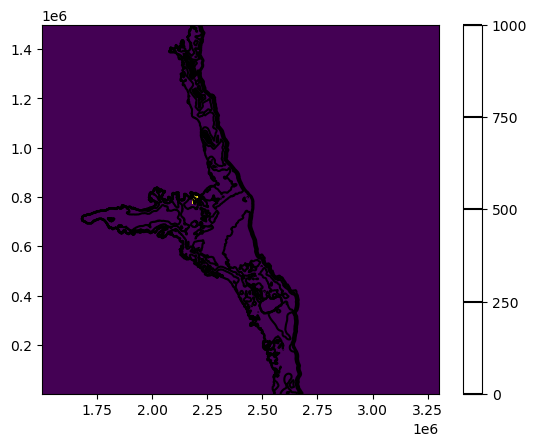

In [17]:
# make masks for salt box

weights = ds.dA
weights.name = "weights"

pnt_bl=(2.21e6,.77e6)
pnt_tr=(2.28e6,.85e6)


# make a mask for where we want to include in the average
mask_mac = np.zeros_like(ds.lon_rho)
mask_mac[(ds.x_rho > pnt_bl[0]) & (ds.x_rho < pnt_tr[0]) & (ds.y_rho > pnt_bl[1]) & (ds.y_rho < pnt_tr[1])]=1

plt.pcolormesh(ds.x_rho,ds.y_rho,mask_mac)
plt.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()



pnt_bl=(2.28e6,.77e6)
pnt_tr=(2.34e6,.85e6)


# make a mask for where we want to include in the average
mask_cdit = np.zeros_like(ds.lon_rho)
mask_cdit[(ds.x_rho > pnt_bl[0]) & (ds.x_rho < pnt_tr[0]) & (ds.y_rho > pnt_bl[1]) & (ds.y_rho < pnt_tr[1])]=1

plt.pcolormesh(ds.x_rho,ds.y_rho,mask_cdit)
plt.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()



pnt_bl=(2.24e6,.85e6)
pnt_tr=(2.34e6,.88e6)


# make a mask for where we want to include in the average
mask_cdpe = np.zeros_like(ds.lon_rho)
mask_cdpe[(ds.x_rho > pnt_bl[0]) & (ds.x_rho < pnt_tr[0]) & (ds.y_rho > pnt_bl[1]) & (ds.y_rho < pnt_tr[1])]=1

plt.pcolormesh(ds.x_rho,ds.y_rho,mask_cdpe)
plt.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()


pnt_bl=(2.24e6,.88e6)
pnt_tr=(2.34e6,.91e6)


# make a mask for where we want to include in the average
mask_cdpw = np.zeros_like(ds.lon_rho)
mask_cdpw[(ds.x_rho > pnt_bl[0]) & (ds.x_rho < pnt_tr[0]) & (ds.y_rho > pnt_bl[1]) & (ds.y_rho < pnt_tr[1])]=1

plt.pcolormesh(ds.x_rho,ds.y_rho,mask_cdpw)
plt.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()



pnt_bl=(2.18e6,.77e6)
pnt_tr=(2.21e6,.81e6)


# make a mask for where we want to include in the average
mask_aiso = np.zeros_like(ds.lon_rho)
mask_aiso[(ds.x_rho > pnt_bl[0]) & (ds.x_rho < pnt_tr[0]) & (ds.y_rho > pnt_bl[1]) & (ds.y_rho < pnt_tr[1])]=1

plt.pcolormesh(ds.x_rho,ds.y_rho,mask_aiso)
plt.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,250,500,750,1000),colors='k')
plt.colorbar()
plt.show()



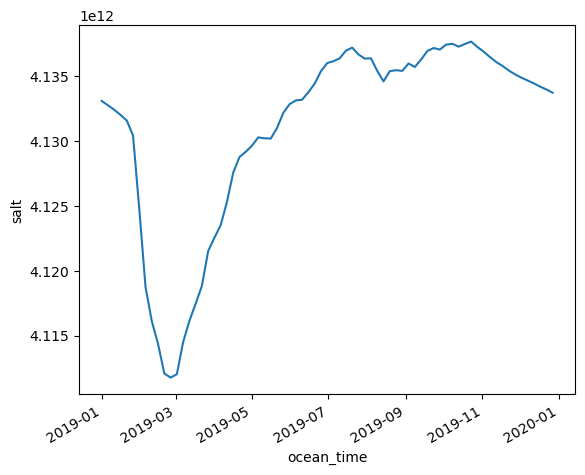

In [18]:
# test sum salt in one of the boxes

ds.salt.where(mask_mac==1).weighted(weights).sum(('xi_rho','eta_rho','s_rho')).plot()


<Figure size 640x480 with 0 Axes>

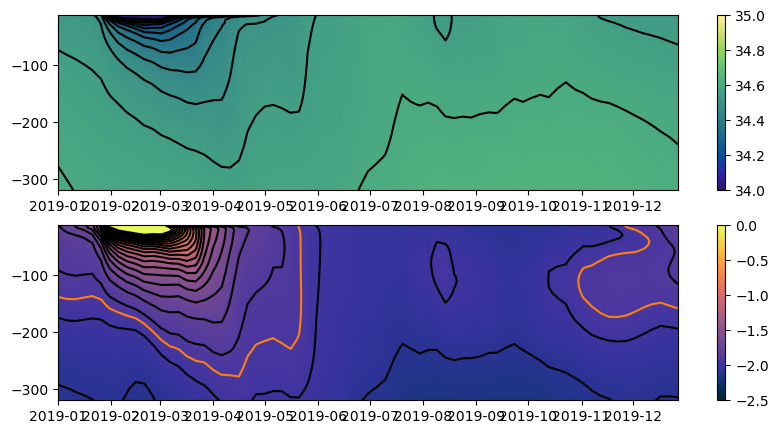

In [19]:
# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=2,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None

ax=fig.add_subplot(gs[0,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')

ax=fig.add_subplot(gs[1,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_mac==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            [-1.95],colors='C1',linestyles='-')

<Figure size 640x480 with 0 Axes>

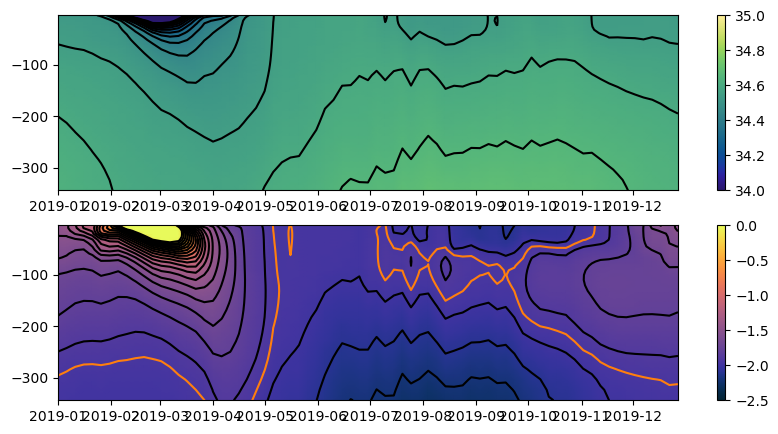

In [20]:
# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=2,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None

ax=fig.add_subplot(gs[0,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')

ax=fig.add_subplot(gs[1,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdit==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            [-1.95],colors='C1',linestyles='-')

<Figure size 640x480 with 0 Axes>

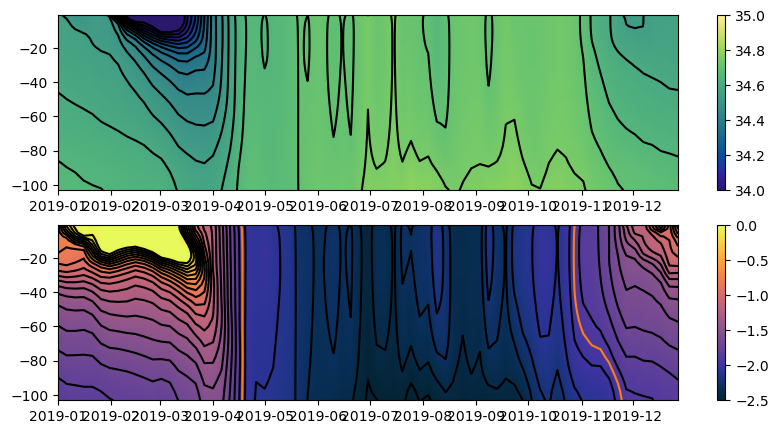

In [21]:
# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=2,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None

ax=fig.add_subplot(gs[0,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')

ax=fig.add_subplot(gs[1,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdpe==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            [-1.95],colors='C1',linestyles='-')

<Figure size 640x480 with 0 Axes>

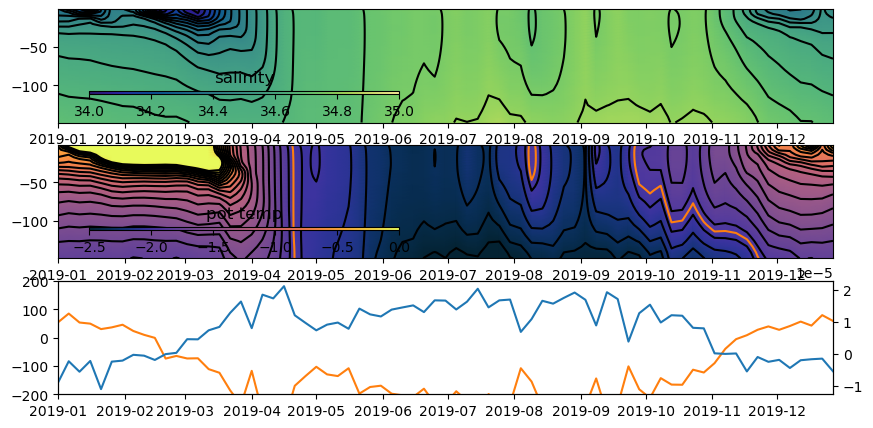

In [22]:
# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=3,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None

ax=fig.add_subplot(gs[0,0])
im=plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)


plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')
cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.25, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_title(r'salinity')

ax=fig.add_subplot(gs[1,0])
im=plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)


plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            [-1.95],colors='C1',linestyles='-')

cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.25, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_title(r'pot temp')

ax=fig.add_subplot(gs[2,0])
plt.plot(ds.ocean_time,ds.shflux.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),'C1')
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylim((-200,200))
ax2 = ax.twinx()
ax2.plot(ds.ocean_time,ds.ssflux.where(mask_cdpw==1).weighted(weights).mean(('xi_rho','eta_rho')),'C0')
ax2.autoscale(enable=True, axis='x', tight=True)
# ax2.set_ylim((-2,2))

<Figure size 640x480 with 0 Axes>

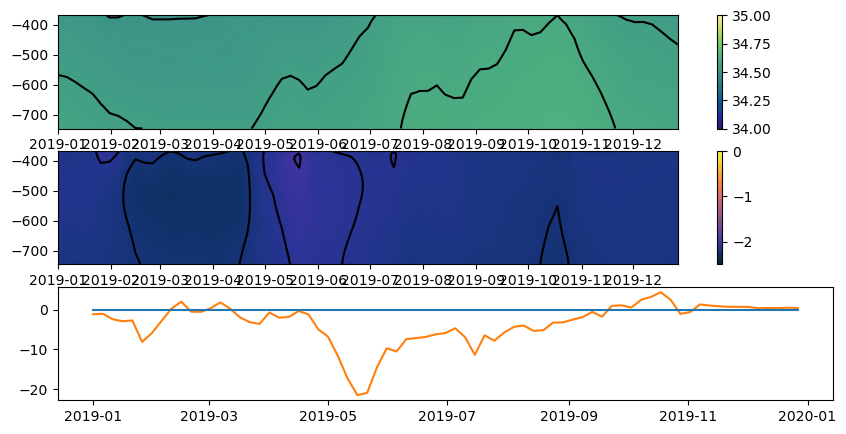

In [23]:
# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=3,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None

ax=fig.add_subplot(gs[0,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.salt.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')

ax=fig.add_subplot(gs[1,0])
plt.pcolormesh(ds.ocean_time,ds.z_rho0.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)
plt.colorbar()
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),
               ds.temp.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')).T,
            [-1.95],colors='C1',linestyles='-')

ax=fig.add_subplot(gs[2,0])
plt.plot(ds.ocean_time,ds.shflux.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),'C1')
plt.plot(ds.ocean_time,ds.ssflux.where(mask_aiso==1).weighted(weights).mean(('xi_rho','eta_rho')),'C0')

(-4e-05, 2e-05)

<Figure size 640x480 with 0 Axes>

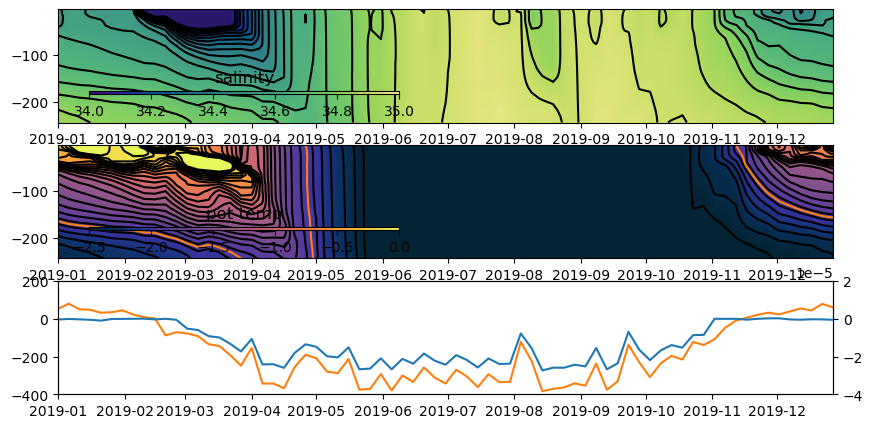

In [24]:
# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=3,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None


where_x=390
where_e=440

ax=fig.add_subplot(gs[0,0])
im=plt.pcolormesh(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.salt.isel(xi_rho=where_x,eta_rho=where_e).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)


plt.contour(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.salt.isel(xi_rho=where_x,eta_rho=where_e).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')
cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.25, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_title(r'salinity')

ax=fig.add_subplot(gs[1,0])
im=plt.pcolormesh(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.temp.isel(xi_rho=where_x,eta_rho=where_e).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)


plt.contour(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.temp.isel(xi_rho=where_x,eta_rho=where_e).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.temp.isel(xi_rho=where_x,eta_rho=where_e).T,
            [-1.95],colors='C1',linestyles='-')

cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.25, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_title(r'pot temp')

ax=fig.add_subplot(gs[2,0])
plt.plot(ds.ocean_time,ds.shflux.isel(xi_rho=where_x,eta_rho=where_e),'C1')
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylim((-400,200))
ax2 = ax.twinx()
ax2.plot(ds.ocean_time,-ds.ssflux.isel(xi_rho=where_x,eta_rho=where_e),'C0')
ax2.autoscale(enable=True, axis='x', tight=True)
ax2.set_ylim((-4*1e-5,2*1e-5))

(-4e-05, 2e-05)

<Figure size 640x480 with 0 Axes>

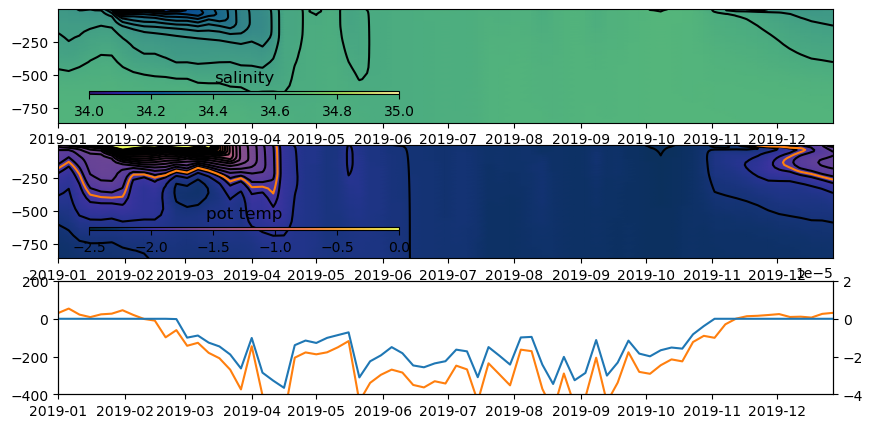

In [25]:
# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=3,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None


where_x=362
where_e=391

ax=fig.add_subplot(gs[0,0])
im=plt.pcolormesh(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.salt.isel(xi_rho=where_x,eta_rho=where_e).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)


plt.contour(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.salt.isel(xi_rho=where_x,eta_rho=where_e).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')
cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.25, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_title(r'salinity')

ax=fig.add_subplot(gs[1,0])
im=plt.pcolormesh(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.temp.isel(xi_rho=where_x,eta_rho=where_e).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)


plt.contour(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.temp.isel(xi_rho=where_x,eta_rho=where_e).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.temp.isel(xi_rho=where_x,eta_rho=where_e).T,
            [-1.95],colors='C1',linestyles='-')

cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.25, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_title(r'pot temp')

ax=fig.add_subplot(gs[2,0])
plt.plot(ds.ocean_time,ds.shflux.isel(xi_rho=where_x,eta_rho=where_e),'C1')
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylim((-400,200))
ax2 = ax.twinx()
ax2.plot(ds.ocean_time,-ds.ssflux.isel(xi_rho=where_x,eta_rho=where_e),'C0')
ax2.autoscale(enable=True, axis='x', tight=True)
ax2.set_ylim((-4*1e-5,2*1e-5))

(-5e-06, 1e-05)

<Figure size 640x480 with 0 Axes>

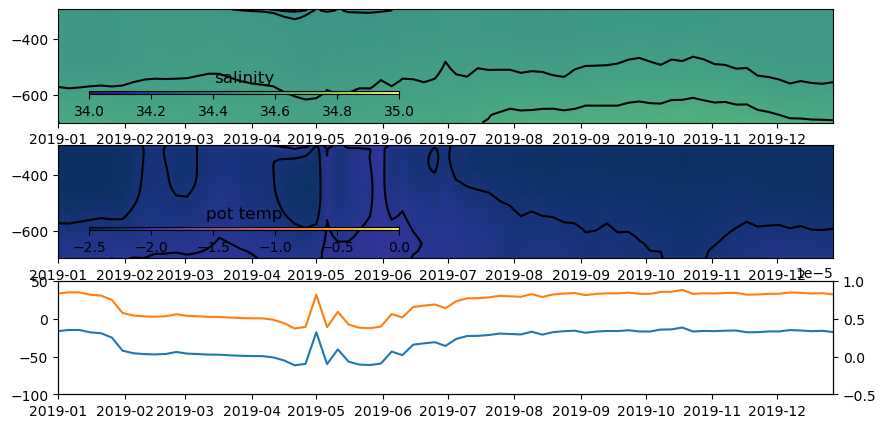

In [26]:



# test sum salt in one of the boxes

gs = gridspec.GridSpec(nrows=3,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,5])
ax = None


where_x=320
where_e=383

ax=fig.add_subplot(gs[0,0])
im=plt.pcolormesh(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.salt.isel(xi_rho=where_x,eta_rho=where_e).T,shading='gouraud',
              cmap='cmo.haline',vmin=34,vmax=35)


plt.contour(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.salt.isel(xi_rho=where_x,eta_rho=where_e).T,
            levels=np.arange(34.0,35.0,0.05),colors='k')
cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.25, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_title(r'salinity')

ax=fig.add_subplot(gs[1,0])
im=plt.pcolormesh(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.temp.isel(xi_rho=where_x,eta_rho=where_e).T,shading='gouraud',
              cmap='cmo.thermal',vmin=-2.5,vmax=0)


plt.contour(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.temp.isel(xi_rho=where_x,eta_rho=where_e).T,
            levels=np.arange(-2.5,0,0.1),colors='k',linestyles='-')
plt.contour(ds.ocean_time,ds.z_rho0.isel(xi_rho=where_x,eta_rho=where_e),
               ds.temp.isel(xi_rho=where_x,eta_rho=where_e).T,
            [-1.95],colors='C1',linestyles='-')

cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.25, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_title(r'pot temp')

ax=fig.add_subplot(gs[2,0])
plt.plot(ds.ocean_time,ds.shflux.isel(xi_rho=where_x,eta_rho=where_e),'C1')
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylim((-100,50))
ax2 = ax.twinx()
ax2.plot(ds.ocean_time,ds.ssflux.isel(xi_rho=where_x,eta_rho=where_e),'C0')
ax2.autoscale(enable=True, axis='x', tight=True)
ax2.set_ylim((-.5*1e-5,1*1e-5))

In [27]:
# def defineBoxBnds(xi,eta):
    


# mac_w_x,mac_w_y=(368),slice(375,403)


# plt.plot(mac_w_x,mac_w_y)


In [28]:
# from matplotlib.patches import Rectangle

# # %matplotlib widget

# plt.figure(figsize=(15,15))
# # ds.my_doy.mean(dim='dayofyear').plot(x='x_rho',y='y_rho',cmap='RdBu',vmin=0,vmax=10)
# ds.h.plot.contour(levels=(0,100,200,300,400,500),colors='k')
# (-1*ds.zice*ds.mask_rho).plot.contour(levels=(0,1),colors='r')

# mac_w_x,mac_w_y=(368),slice(375,403)

# # plt.plot(ds.mask_rho[mac_w[0],mac_w[1]].x_rho.values,ds.mask_rho[mac_w[0],mac_w[1]].y_rho.values)

# # pnt_bl=(2.21e6,.77e6)
# # pnt_tr=(2.28e6,.85e6)

# # plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))

# # pnt_bl=(2.28e6,.77e6)
# # pnt_tr=(2.34e6,.85e6)

# # plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))

# # pnt_bl=(2.24e6,.85e6)
# # pnt_tr=(2.34e6,.88e6)

# # plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))

# # pnt_bl=(2.24e6,.88e6)
# # pnt_tr=(2.34e6,.91e6)

# # plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))



# # pnt_bl=(2.18e6,.77e6)
# # pnt_tr=(2.21e6,.81e6)

# # plt.gca().add_patch(Rectangle(pnt_bl,pnt_tr[0]-pnt_bl[0],pnt_tr[1]-pnt_bl[1],linewidth=1,edgecolor='r',facecolor='none'))




# %matplotlib inline

In [29]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
# now look at heat coming onto shelf
target_depth = -400

temp400 = grid.transform(ds.temp, 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()
# salt400_FM = grid.transform(ds.salt, 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()

temp400_clima = temp400.groupby('ocean_time.dayofyear').mean()

In [ ]:
from scipy.ndimage import gaussian_filter1d


temp400.isel(ocean_time=slice(25,85)).mean(dim='ocean_time').plot(vmin=-2,vmax=-.5)
co1 = plt.contour(ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = plt.contour(ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = plt.contour(ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.axis((325,475,225,450))
plt.plot(450,335,'x',color='C1')
plt.plot(408,262,'x',color='C2')
plt.show()

plt.plot(ds.ocean_time,temp400.isel(xi_rho=450,eta_rho=335),color='C1',linewidth=.5,label='400m temp - outer shelf')
plt.plot(ds.ocean_time,gaussian_filter1d(temp400.isel(xi_rho=450,eta_rho=335), 5),color='C1',linewidth=2.5,label='400m temp - outer shelf (5-day filter)')
plt.plot(ds.ocean_time,temp400.isel(xi_rho=408,eta_rho=262),color='C2',linewidth=.5,label='400m temp - coast')
plt.plot(ds.ocean_time,gaussian_filter1d(temp400.isel(xi_rho=408,eta_rho=262), 5),color='C2',linewidth=2.5,label='400m temp - coast (5-day filter)')
plt.show()



In [ ]:
image_save_dpi = 1000

plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])


# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')

ax.plot(temp400_clima.dayofyear,temp400_clima.isel(xi_rho=450,eta_rho=335),color='C1',linewidth=1.5)#,label='400m temp - outer shelf')
ax.plot(temp400_clima.dayofyear,gaussian_filter1d(temp400_clima.isel(xi_rho=450,eta_rho=335), 5),color='C1',linewidth=5,label='400m temp @ outer shelf')
ax.plot(temp400_clima.dayofyear,temp400_clima.isel(xi_rho=408,eta_rho=262),color='lightcoral',linewidth=1.5)#,label='400m temp - coast')
ax.plot(temp400_clima.dayofyear,gaussian_filter1d(temp400_clima.isel(xi_rho=408,eta_rho=262), 5),color='lightcoral',linewidth=5,label='400m temp @ coast')



# ax.annotate("400m temp @ outer shelf",
#             xy=(250,-1), xycoords='data',
#             xytext=(250,-1), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.75))

plt.rcParams.update({'font.size': 16})
plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel(r'Temperature ($\theta$ $^\circ$C)')
ax.set_xlabel('day of year')
# ax.grid()
ax.legend(frameon=False,loc='upper right')
ax.set_title('')

In [ ]:
# now melt rate variability
ds['m'] = ds.m.where(ds.m<1e35,np.NaN)
ds['my'] = ds.m*(60*60*24*365)
# ds.my.mean(dim='ocean_time').where(ds.zice<-500).plot(vmin=-10,vmax=10)
# time evolution of melt rate

ds['my_doy'] = ds.my.groupby('ocean_time.dayofyear').mean()

In [ ]:
image_save_dpi = 1000

plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])


(ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C0',linewidth=1.5)#,label='mean melt (zice<500m)')
plt.plot(ds.dayofyear,gaussian_filter1d((ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='C0',linewidth=5,label='mean melt')
(ds.my_doy*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C1',linewidth=1.5)#,label='mean melt (zice>500m)')
plt.plot(ds.dayofyear,gaussian_filter1d((ds.my_doy*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='C1',linewidth=5,label='mean melt (zice>500m)')

plt.rcParams.update({'font.size': 16})
plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel(r'melt rate (m/yr)')
ax.set_xlabel('day of year')
# ax.grid()
ax.legend(frameon=False,loc='lower left')
ax.set_title('')


In [ ]:
(ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).mean(dim='dayofyear')


In [ ]:
# isw plume strength
import seawater as sw

sigma_0_surf = sw.pden(ds.salt.isel(s_rho=-1).values,sw.temp(ds.salt.isel(s_rho=-1).values,ds.temp.isel(s_rho=-1).values,ds.z_rho0.isel(s_rho=-1).values),ds.z_rho0.isel(s_rho=-1).values,0)-1000
ds['sigma_0_surf']=(('ocean_time','eta_rho','xi_rho'),sigma_0_surf)


mask = np.zeros_like(ds.lon_rho)
mask[380:386,318:323]=1


ds['sigma_0_surf_clima'] = ds.sigma_0_surf.groupby('ocean_time.dayofyear').mean()

In [ ]:
image_save_dpi = 1000

plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])


# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')


(ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='orangered',linewidth=1.5)#,label='mean melt (zice<500m)')
plt.plot(ds.dayofyear,gaussian_filter1d((ds.my_doy*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='orangered',linewidth=5,label='AIS mean melt')
# (ds.my_doy*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C1',linewidth=.5)#,label='mean melt (zice>500m)')
# plt.plot(ds.dayofyear,gaussian_filter1d((ds.my_doy*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='C1',linewidth=2,label='mean melt (zice>500m)')


ax2 = ax.twinx()  # instantiate a second Axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('sin')#, color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

ax2.plot(ds.dayofyear,ds.sigma_0_surf_clima.where(mask==1).weighted(weights_area).mean(('eta_rho','xi_rho')),color='skyblue',linewidth=1.5)
ax2.plot(ds.dayofyear,gaussian_filter1d(ds.sigma_0_surf_clima.where(mask==1).weighted(weights_area).mean(('eta_rho','xi_rho')),2),color='skyblue',linewidth=5,label='$\sigma_0$ @ outflow')
ax2.set_ylabel('surface $\sigma_0$ anomay (kg/m$^3$)')



plt.rcParams.update({'font.size': 16})
plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel(r'melt rate (m/yr)')
ax.set_xlabel('day of year')
# ax.grid()

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2,frameon=False,loc='lower left')

# ax.legend(frameon=False,loc='lower left')
ax.set_title('')



In [ ]:
frc = xr.open_dataset('../../frc/amery_v2km_tamura+era_shflux.nc')



In [ ]:


# make heat flux plot
(frc.shflux*ds.mask_rho*~ds.mask_zice).mean(dim='shf_time').plot(levels=12)
co1 = plt.contour(ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = plt.contour(ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = plt.contour(ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.axis((300,450,350,600))
plt.plot(390,440,'x',color='C1')
plt.plot(362,391,'x',color='C2')

plt.show()

plt.plot(frc.shf_time,frc.shflux.isel(xi_rho=390,eta_rho=440),color='C1',linewidth=.5,label='shflux - CD')
plt.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=390,eta_rho=440), 5),color='C1',linewidth=2.5,label='shflux - CD (5-day filter)')
plt.plot(frc.shf_time,frc.shflux.isel(xi_rho=362,eta_rho=391),color='C2',linewidth=.5,label='shflux - Ma')
plt.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=362,eta_rho=391), 5),color='C2',linewidth=2.5,label='shflux - Ma (5-day filter)')


In [ ]:
image_save_dpi = 1000

plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])


# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')

ax.plot(frc.shf_time,frc.shflux.isel(xi_rho=362,eta_rho=391),color='C2',linewidth=1.5)#,label='shflux - Ma')
ax.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=362,eta_rho=391), 5),color='C2',linewidth=5,label='Mackenzie polynya')
ax.plot(frc.shf_time,frc.shflux.isel(xi_rho=390,eta_rho=440),color='steelblue',linewidth=1.5)#,label='shflux - CD')
ax.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=390,eta_rho=440), 5),color='steelblue',linewidth=5,label='Cape Darnley')



plt.rcParams.update({'font.size': 16})
plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel(r'surface heat flux (W/m$^2$)')
ax.set_xlabel('day of year')
# ax.grid()

ax.legend(frameon=False,loc='lower left')
ax.set_title('')



In [ ]:
# make bottom density 
sigma_0_bot = sw.pden(ds.salt.isel(s_rho=0).values,sw.temp(ds.salt.isel(s_rho=0).values,ds.temp.isel(s_rho=0).values,ds.z_rho0.isel(s_rho=0).values),ds.z_rho0.isel(s_rho=0).values,0)-1000
ds['sigma_0_bot']=(('ocean_time','eta_rho','xi_rho'),sigma_0_bot)


ds['sigma_0_bot_clima'] = ds.sigma_0_bot.groupby('ocean_time.dayofyear').mean()

In [ ]:
image_save_dpi = 1000

plt.rcParams['figure.dpi'] = image_save_dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,5])
ax = None

ax=fig.add_subplot(gs[0,0])



# ax.axvline((32),color='0.9')
# ax.axvline((60),color='0.9')
ax.axvline((91),color='0.9') #apr
# ax.axvline((121),color='0.9')
# ax.axvline((152),color='0.9')
ax.axvline((182),color='0.9') #july
# ax.axvline((213),color='0.9')
# ax.axvline((244),color='0.9')
ax.axvline((274),color='0.9') #oct
# ax.axvline((305),color='0.9')
# ax.axvline((335),color='0.9')

ax.plot(ds.dayofyear,ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=440),color='steelblue',linewidth=1.5)
ax.plot(ds.dayofyear,gaussian_filter1d(ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=440), 2),color='steelblue',linewidth=5,label='bottom $\sigma_0$ - Cape Darnley')
# ax.plot(ds.dayofyear,ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=462),color='C4',linewidth=.5)
# ax.plot(ds.dayofyear,gaussian_filter1d(ds.sigma_0_bot_clima.isel(xi_rho=390,eta_rho=462), 2),color='C4',linewidth=2.5,label='bottom $\sigma_0$ - Burton basin')



plt.rcParams.update({'font.size': 16})
plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((0,365))
# ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel('bottom $\sigma_0$ anomaly (kg/m$^3$)')
ax.set_xlabel('day of year')
# ax.grid()

ax.legend(frameon=False,loc='upper left')
ax.set_title('')



